# Assignment 1: Network Analysis and Modeling

**Course:** Social Graphs and Interactions (02805)  
**Semester:** Spring 2025  
**Technical University of Denmark**

---

## Group Information

**Group Members:**
- Thor Nørgaard Eriksen (s204618)
- Søren Mondrup (s214983)


---

## Table of Contents

1. [Assignment 1.1: Exploring WS and BA Models](#assignment-11-exploring-ws-and-ba-models)
   - [Reading Questions](#reading-questions)
   - [WS Edition](#ws-edition)
   - [BA Edition](#ba-edition)

2. [Assignment 1.2: Stats and Visualization of the Rock Music Network](#assignment-12-stats-and-visualization-of-the-rock-music-network)
   - [Process Explanation](#process-explanation)
   - [Simple Network Statistics and Analysis](#simple-network-statistics-and-analysis)
   - [Network Visualization](#network-visualization)

3. [References](#references)

---

## Assignment 1.1: Exploring WS and BA Models

### Reading Questions



**Questions:**
- What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
- List the four regimes that characterize random networks as a function of $\langle k \rangle$.
- According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

#### What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> It misses the fact that some nodes are outliers (hubs) that connect to way more than $\langle k \rangle$ other nodes. If using a random network the range between $k_{min}$ and $k_{max}$ is going to be artificially narrow, which means the network almost never sees a President Roosevelt with 22,000 known aquaintances or Facebook users with more than 5,000 friends. This is also seen in [Barabasi - Image 3.6]  where the green line is a poisson prediction and the purple dots are the actual degree-distributions of real world networks. $p_k$ decreases a lot faster for rising $k$ in the poisson than in the real examples, but is also too low for low k. The area around $\langle k \rangle$ is the only place where the poisson overestimates the probability, which leads to a distribution with short tails.

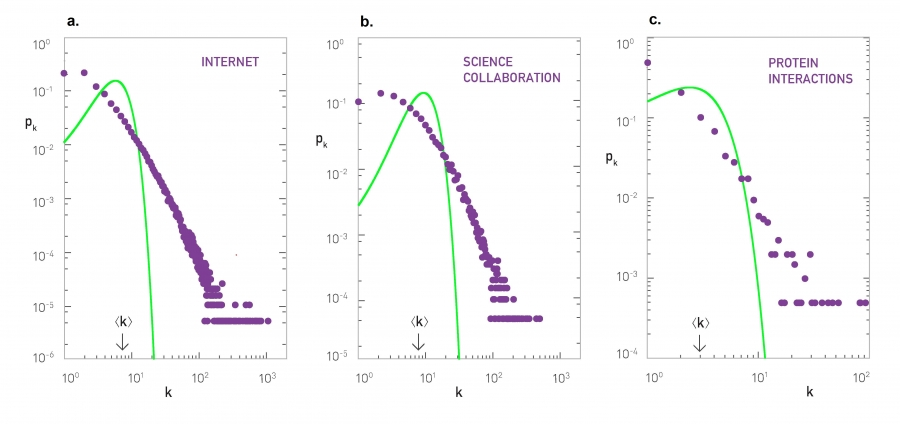

**Reference:** Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.5 and Image 3.6

#### List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * Subcritical Regime $(\langle k \rangle < 1)$
>
>  No giant component can form. Very sparse network and a number of tiny clusters depending on $\langle k \rangle$. The size of the largest cluster $N_G$ increases slower $(ln N)$ than the sizer of the network, so the relative size of the largest cluster goes to zero for large $N$.
>
> * Critical point $(\langle k \rangle = 1)$
>
> First formation of a giant component. $N_G  \approx  N^{2/3}$ so still less than N leading it to still go to zero as N increases. $N_G$ is significantly higher than in Subcritical in absolute terms.
>
> * Supercritical Regime $(1 < \langle k \rangle < ln N)$
>
> The most relevant when comparing to real systems. We now have a giant component. $\langle k \rangle$ close to 1, the fraction of nodes in the giant component is $N_G \approx (p-p_c)N$ where p_c approx 1/N
>
> * Connected regime $(\langle k \rangle > ln N)$
>
> Giant component absorbs all nodes (Nɢ = N), creating a fully connected network. Network can still be sparse despite full connectivity.

**Reference**: Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.6

#### According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
> Random network theory predicts $C_i = \frac{ \langle k \rangle}{N}$ [Equation 3.21], which means: Clustering decreases as 1/N for growing networks with fixed ⟨k⟩, and that clustering is independent of a node's degree k. Real networks contradict both of these claims: $C$ is independent of network size $N$, but strongly dependent on degree $k$, decreasing for high-degree nodes. Both of those predictions are shown against real data in [Barabasi - Image 3.13] below.
>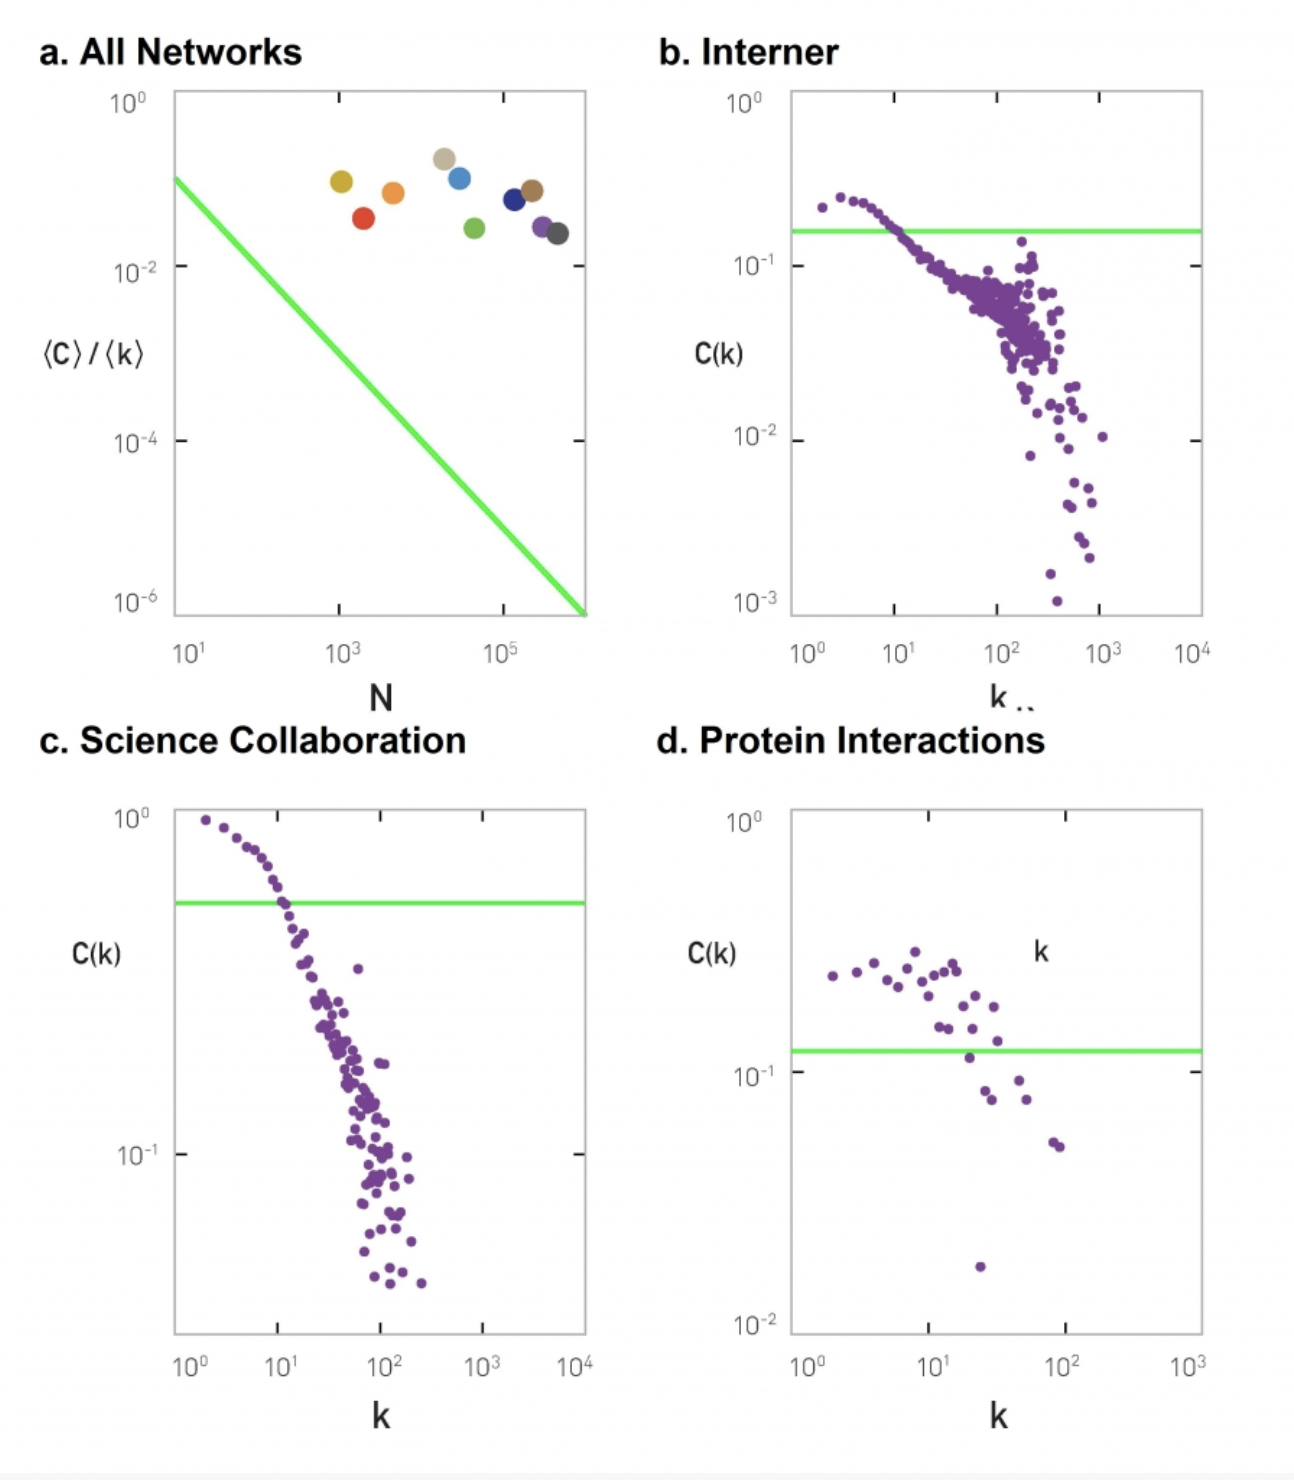
> Illustration that the prediction that $C$ scales negatively with $N$ is shown to be false in a. The network size has no systematic influence on the clustering. The other three show how the average clustering coefficent is decreasing for rising k, directly disproving the other prediction in equation 3.21. Increasing the degree of a node clearly decreases the average clustering.

**Reference**: Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.9

### WS Edition


We start by plotting the graphs with the three different rewiring probabilities, while keeping number of nodes and average degree constant.

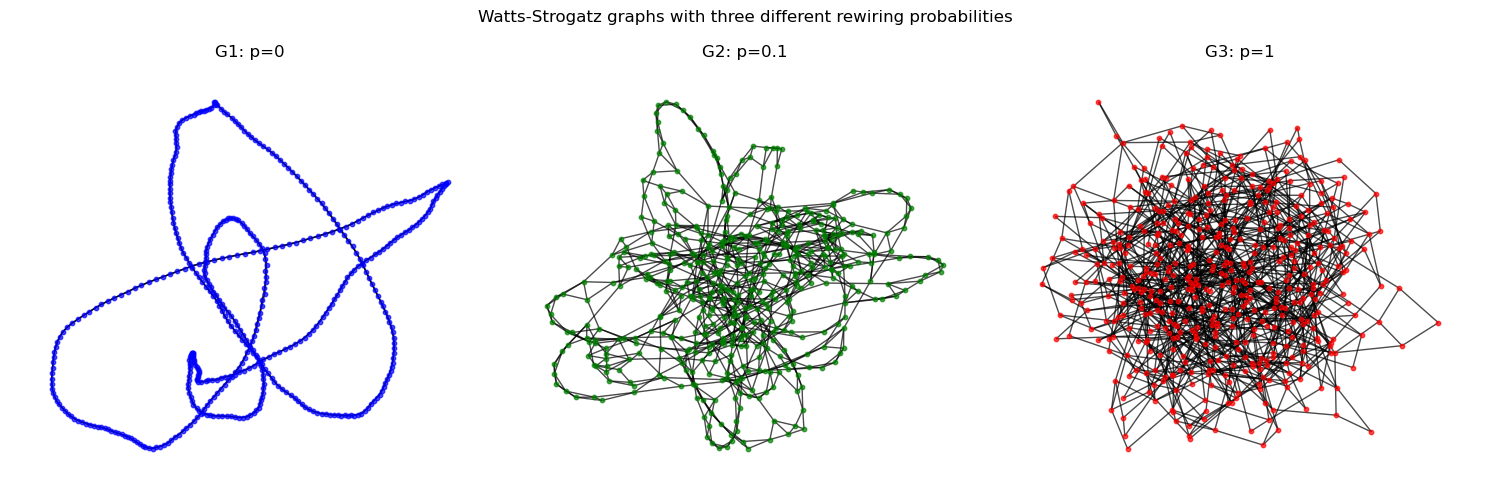

Watts-Strogatz Graphs:
G1 (p=0): Average shortest path length: 62.88
G2 (p=0.1): Average shortest path length: 7.28
G3 (p=1): Average shortest path length: 4.75
G1 (p=0): Clustering coefficient: 0.500
G2 (p=0.1): Clustering coefficient: 0.356
G3 (p=1): Clustering coefficient: 0.004


In [26]:
import networkx as nx
import matplotlib.pyplot as plt
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, ax=axes[0], node_size=10, node_color='blue', alpha=0.7)
axes[0].set_title('G1: p=0')

nx.draw(G2, ax=axes[1], node_size=10, node_color='green', alpha=0.7)
axes[1].set_title('G2: p=0.1')

nx.draw(G3, ax=axes[2], node_size=10, node_color='red', alpha=0.7)
axes[2].set_title('G3: p=1')
fig.suptitle('Watts-Strogatz graphs with three different rewiring probabilities')
plt.tight_layout()
plt.show()
print("Watts-Strogatz Graphs:")
print("G1 (p=0): Average shortest path length:", f"{nx.average_shortest_path_length(G1):.2f}")
print("G2 (p=0.1): Average shortest path length:", f"{nx.average_shortest_path_length(G2):.2f}")
print("G3 (p=1): Average shortest path length:", f"{nx.average_shortest_path_length(G3):.2f}")
print("G1 (p=0): Clustering coefficient:", f"{nx.average_clustering(G1):.3f}")
print("G2 (p=0.1): Clustering coefficient:", f"{nx.average_clustering(G2):.3f}")
print("G3 (p=1): Clustering coefficient:", f"{nx.average_clustering(G3):.3f}")

It is clearly observed how the average shortest path decreases very quickly with a rising p. Rewiring 100 of the 1000 edges, leads to a 8x reduction of average shortest path length ($62.88/5.52 = 8.36$) in the path. This shows the small world quality: We need to change relatively low amounts of edges to make the network have a much shorter $\langle d \rangle$. However, the small world network still retains a high clustering coefficient $\langle C \rangle$, as we have only rewired 10% of the edges from the blue network.

When compared to the Erdos-Rényi network in red, we see that $\langle d \rangle$ becomes a little shorter, but that it also lowers $\langle C \rangle$ as the randomness means that fewer of the 4 neighboring nodes are connected to each other.

To better understand the progression we measure for more values of p:

In [22]:
import numpy as np

for i in np.arange(0, 1.1, 0.1):
    G = nx.watts_strogatz_graph(500, 4, i)
    print(f"G (p={i:.2f}): Average shortest path length:", f"{nx.average_shortest_path_length(G):.2f}", "Clustering coefficient:", f"{nx.average_clustering(G):.3f}")

G (p=0.00): Average shortest path length: 62.88 Clustering coefficient: 0.500
G (p=0.10): Average shortest path length: 7.56 Clustering coefficient: 0.378
G (p=0.20): Average shortest path length: 6.37 Clustering coefficient: 0.301
G (p=0.30): Average shortest path length: 5.43 Clustering coefficient: 0.179
G (p=0.40): Average shortest path length: 5.12 Clustering coefficient: 0.101
G (p=0.50): Average shortest path length: 4.96 Clustering coefficient: 0.071
G (p=0.60): Average shortest path length: 4.90 Clustering coefficient: 0.048
G (p=0.70): Average shortest path length: 4.78 Clustering coefficient: 0.019
G (p=0.80): Average shortest path length: 4.78 Clustering coefficient: 0.019
G (p=0.90): Average shortest path length: 4.75 Clustering coefficient: 0.007
G (p=1.00): Average shortest path length: 4.74 Clustering coefficient: 0.004


We know from [Barabasi - Chapter 3] that for a random networks:

$\langle d \rangle \approx \frac{ln N}{ln \langle k \rangle}$ (3.19):

In [18]:
import math
d = math.log(500)/math.log(4)
print("Expected average shortest path length:", f"{d:.2f}")

Expected average shortest path length: 4.48


So for p = 1, we have the value that comes closes to the truly random network. Since the graphs are generated stochastically we need to add a bit of simulation to get more stable results. So in the following block we write a loop that runs through six different $p$ to show the behaviour of the $\langle d \rangle$ under increasing $p$.

Averages and standard deviations:
p = 0: avg = 62.8758, std = 0.0000
p = 0.01: avg = 23.3244, std = 4.0398
p = 0.03: avg = 12.9759, std = 1.2132
p = 0.05: avg = 10.3382, std = 0.7542
p = 0.1: avg = 7.6801, std = 0.2566
p = 0.2: avg = 6.1102, std = 0.1181


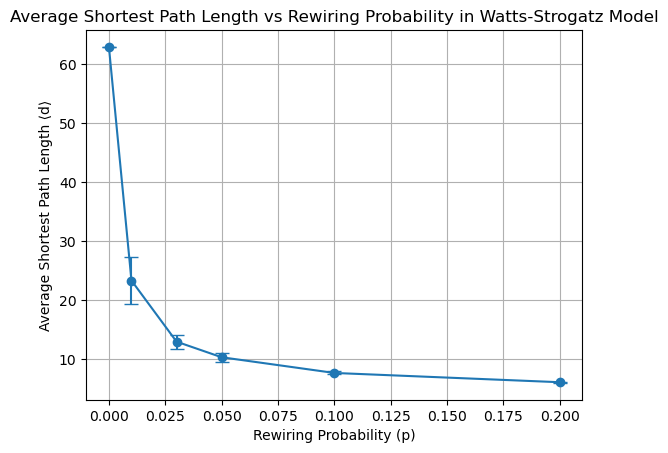

In [23]:
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
# Initialize dictionary to store results for each p value
results = {}
for prob in p:
    results[prob] = np.zeros(50)

# Generate 50 networks for each p value
for i in range(50):
    for prob in p:
        G = nx.watts_strogatz_graph(500, 4, prob)
        results[prob][i] = nx.average_shortest_path_length(G)

p0 = results[0]
p001 = results[0.01]
p003 = results[0.03]
p005 = results[0.05]
p01 = results[0.1]
p02 = results[0.2]

# Calculate means and standard deviations
means = [np.mean(p0), np.mean(p001), np.mean(p003), np.mean(p005), np.mean(p01), np.mean(p02)]
stds = [np.std(p0), np.std(p001), np.std(p003), np.std(p005), np.std(p01), np.std(p02)]

print("Averages and standard deviations:")
for i, prob in enumerate(p):
    print(f"p = {prob}: avg = {means[i]:.4f}, std = {stds[i]:.4f}")

# Create plot with error bars
plt.errorbar(p, means, yerr=stds, marker='o', capsize=5)
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in Watts-Strogatz Model')
plt.grid(True)
plt.show()

>**Figure 1:** The plot shows how the rewiring probability $(p)$ affects the average shortest path length $\langle d \rangle$ of a Watts-Strogatz network (N=500 nodes, $\langle k \rangle$). Each data point represents the mean $\langle d \rangle$ taken over 50 network simulations, with the error bars showing the standard deviation. It specifically highlights how quickly the rewiring mechanic introduces the small world phenomena in the network. With just 0.05 rewiring probability (changing 5% of the 1000 edges) the shortest distance becomes less than 1/6 of the p = 0 network. It's also seen that the sd-bands get very small even as relative values of the average, when we rewire a big enough part, then the avg shortest path length varies very little, showing that in a big enough network with completely random connections the shortest path lenght is very stable.

Reference: Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.8 and 3.9

### BA Edition

**Questions:**
- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

#### What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> First we need to understand equation (4.18):
>
> $k_{max} = k_{min} N^{\frac{1}{\gamma-1}}$
>
> Which states that the size of the biggest hub is equal to the size of the smallest one times the total number of nodes lifted to a degree exponent. This tells us how a network scales with N in three regimes with very different characteristics.
>
> * Anomalous regime $\gamma \leq 2$
>
>$k_{max}$ grows faster than N, so the number of connections for the biggest hub grows faster than the size of the network. This means that for a high enough N, the biggest hub will have more connections than there are other nodes, something that can't exist without allowing redundant multi-links as it will run out of nodes to connect to.
>
> * Scale-free regime $2 < \gamma < 3$ 
>
> For this regime we see slower than N growth of the biggest hub, so the market share (fraction of nodes connected to the largest hub) for the biggest hub decreases for large N, but the second moment ($\langle k^2\rangle$) still diverges: This is also called the ultra-small world, since $\langle d \rangle$ is kept very low by having big hubs which allow short distances to most other nodes.
>
> * Random network regime $\gamma > 3$
>
>Both $\langle k \rangle$ and $\langle k^2\rangle$ converge, leading to the behaviours similar to the random network. The distance resembles the small world behaviour of random networks where $\langle d \rangle$ scales with ln(N). We need very large N (over 100 million nodes for γ = 5) to even distinquish them from random networks

**Reference**: Barabási, A.-L. (2016). Network Science, Chapter 4, Section 4.7 "Degree Exponent"

#### What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> * Sublinear preferential attachment (0 < α < 1)
>
>Attachment probability $\prod k \propto k^\alpha$ with α < 1 weakens the rich-get-richer effect. Hub degree grows slowly as $k_{max}\approx (ln \quad t)^{1/(1-\alpha)}$. This creates relatively equal networks where early nodes don't dominate and late entrants can still gain significant market share.
>
> * Linear Regime (α = 1)
>
>The normal Barabási-Albert model where $\prod k \propto k$. Hub degree grows as $k_{max}\approx t^{1/2}$. This balances preferential attachment (rich-get-richer) with opportunities for new nodes, creating the power-law distributions we see in many real networks.
>
> * Superlinear Preferential Attachment (α > 1)
>
>Attachment probability  $\prod k \propto k^\alpha$ with $\alpha  > 1$ creates extreme winner-takes-all dynamics. The first node's degree grows as $k_{max}\approx t$, capturing nearly all new connections. Results in monopolistic networks where early advantages are impossible to overcome for new nodes.
>
**Reference:** Barabási, A.-L. (2016). Network Science, Chapter 5, Section 5.7 and 5.8

#### Implementation of Barabasi-Albert model
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.

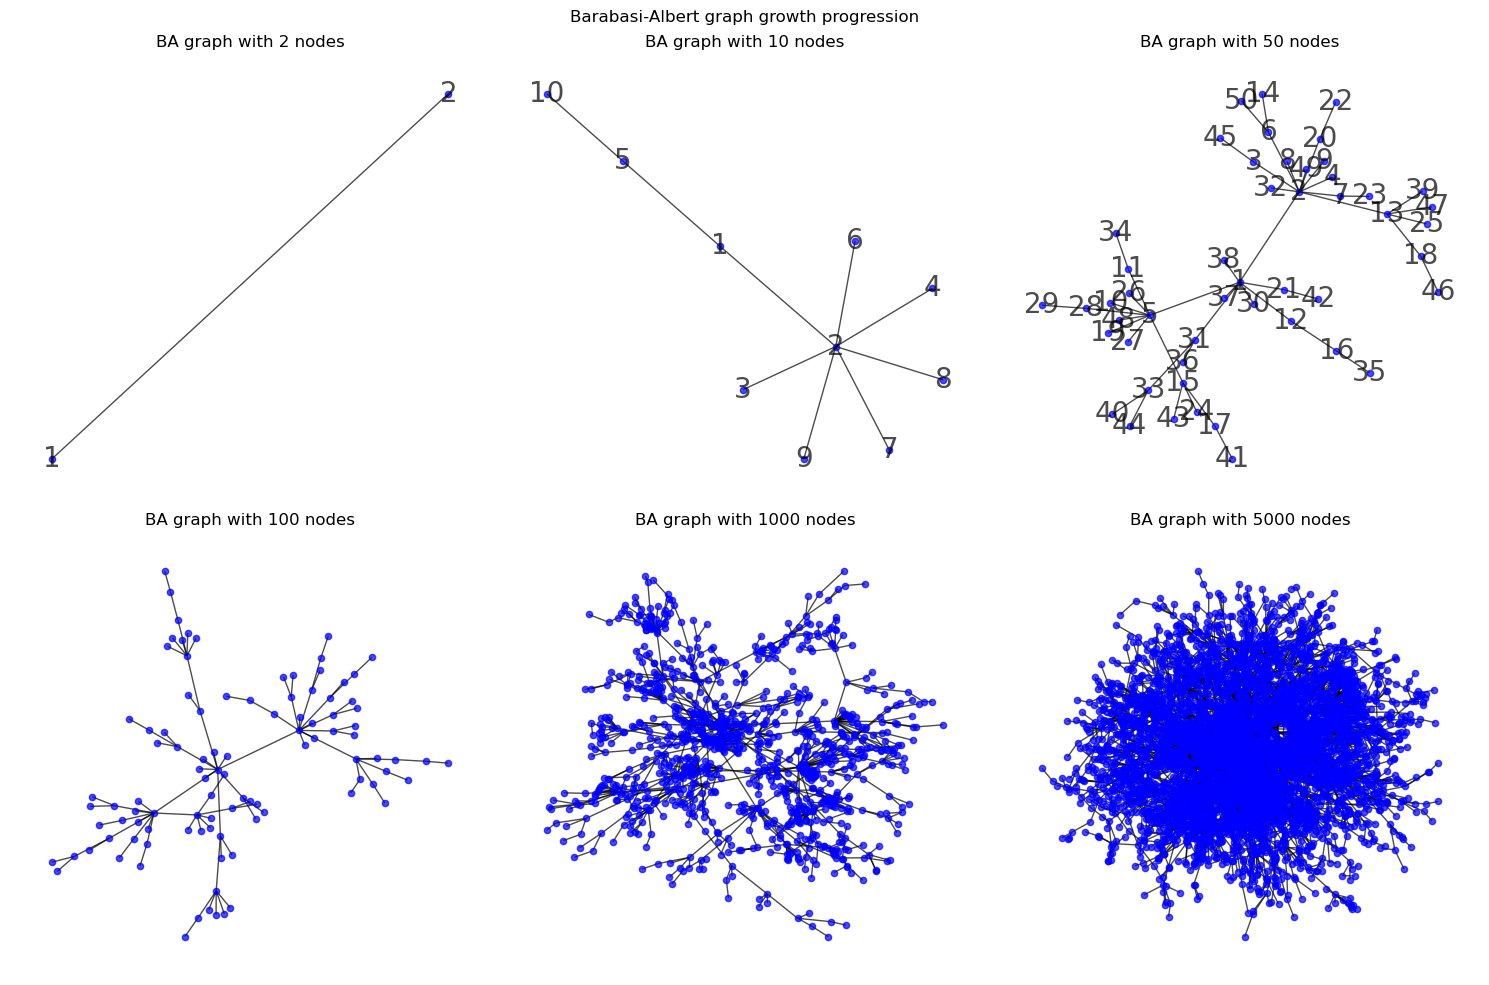

In [31]:
import random
# Making a grouping of 3x2 plots to show the growth of a Barabasi-Albert graph.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Track which plots we need to make
target_nodes = [10, 50, 100, 1000, 5000]
plot_positions = [(0,1), (0,2), (1,0), (1,1), (1,2)]
current_plot = 0

# Creating a graph of just a single link.
BA = nx.Graph()
BA.add_nodes_from([1,2])
BA.add_edge(1,2)

nx.draw(BA, ax=axes[0,0], node_size=20, node_color='blue', alpha=0.7, with_labels=True, font_size=20)
axes[0,0].set_title(f'BA graph with 2 nodes')

# Expanding to 5000 nodes
for i in range(3, 5001):
    # For each new node, we create a list of all nodes in the existing edges. Nodes with many connections will appear more often in the list,
    # and have a higher chance of being chosen to connect to the new node.
    edges = list(BA.edges())
    nodes_in_edges = []
    for edge in edges:
        for node in edge:
            nodes_in_edges.append(node)

    # Add the i'th node and connect it to a random node from the list.
    BA.add_node(i) 
    j = random.choice(nodes_in_edges)
    BA.add_edge(i, j)

    # Plot for the target number of nodes
    if i in target_nodes and current_plot < len(plot_positions):
        row, col = plot_positions[current_plot]
        # Add node labels for graphs with less than 100 nodes
        if i < 100:
            nx.draw(BA, ax=axes[row, col], node_size=20, node_color='blue', alpha=0.7, with_labels=True, font_size=20)
        else:
            nx.draw(BA, ax=axes[row, col], node_size=20, node_color='blue', alpha=0.7)
        axes[row, col].set_title(f'BA graph with {i} nodes')
        current_plot += 1

fig.suptitle('Barabasi-Albert graph growth progression')
plt.tight_layout()
plt.show()


**Figure 2:** Growth progression of Barabási-Albert network with m=1 (one link per new node). The visualizations show the network at N=2, 10, 50, 100, 1000, and 5000 nodes. Nodes 1 and 2 are included in a lot more random draws than the latter nodes due to first-mover advantage in preferential attachment. By N=5000, the visualization becomes uninformative at this scale, leading to a nee d for degree distribution analysis.

Let's look at the max and min degrees:

In [ ]:
degree_sequence = [d for _, d in BA.degree()] # Extract just the degrees for all nodes, without the name of each node
dmax = max(degree_sequence)
dmin = min(degree_sequence)
print(f"Max degree {dmax}, min degree {dmin}")


Max degree 103, min degree 1


Pretty wide interval, but still smaller than superlinear, where we would expect the biggest to be attached to a lot more nodes. The min degree is always 1 for the last node added, so the size of the interval is completely controlled by the size of the max degree.

Plotting the degree distribution to get a better understanding of 

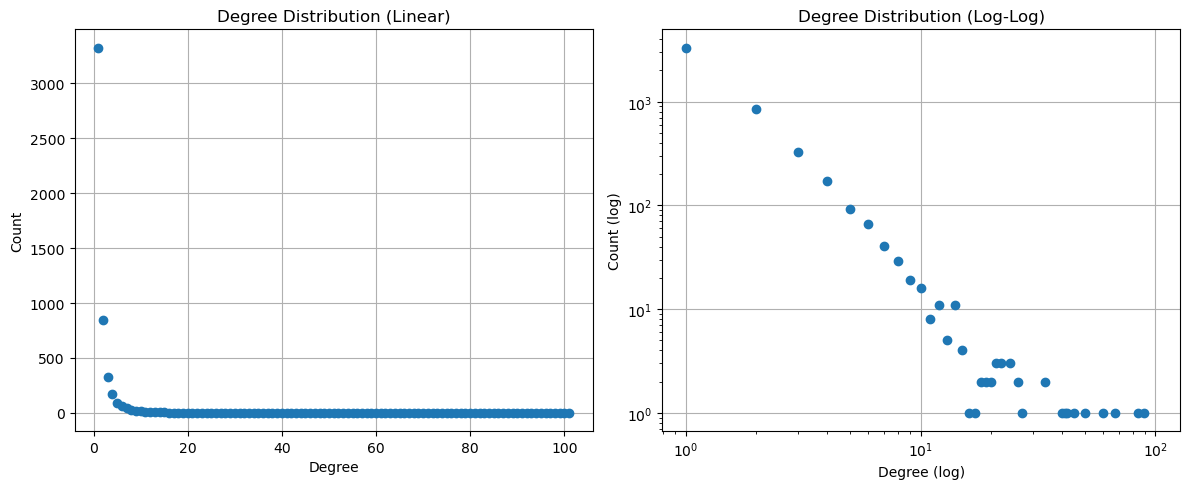

In [46]:
# Create bins for the histogram
v = np.arange(dmin, dmax, 1)
hist = np.histogram(degree_sequence, bins=v)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear plot
ax1.plot(hist[1][:-1], hist[0], 'o')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Count')
ax1.set_title('Degree Distribution (Linear)')
ax1.grid(True)

# Log-log plot
ax2.plot(hist[1][:-1], hist[0], 'o')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Degree (log)')
ax2.set_ylabel('Count (log)')
ax2.set_title('Degree Distribution (Log-Log)')
ax2.grid(True)

plt.tight_layout()
plt.show()


**Figure 3:** Degree distribution of BA network with N=5000, m=1. Left is linear scale and right is log-log scale. The log-log plot shows that the model has approximate linear decay, indicating that we have scale-free nature.

With N=5000 and m=1, we observe $k_{max}$ = 103 and $k_{min}$ = 1, giving a scaling range of roughly 2 orders of magnitude.

The theoretical prediction for the BA model is $\gamma$ = 3. Visual inspection suggests our slope is might be approximate, though precise exponent estimation would require more precise methods than visual fitting.

---

## Assignment 1.2: Stats and Visualization of the Rock Music Network

### Process Explanation

**Steps:**
1. **[Your process step-by-step]**
    1. The process consisted of 3 overall parts: Finding all nodes, saving each of them, and then scraping them to create the network.
        1. We scraped the wiki-overview page to find all relevant nodes. This included converting their wiki names to actual URLS by converting e.g. spaces to underscores.
        2. We scraped each of the wiki-pages of the relevant nodes, found a viable file-name (a file cannot be called "AC/DC.txt"), and saved the contents of the wiki-page to a txt.file
        3. We loaded txt files, scraped them for links, kept links that mapped to the relevant nodes and added a directed edge between the node and its related nodes.
2. **[Most difficult parts]**
    1. Converting link names to relevant URLs and safe file names was the most difficult part. Symbols and letters outside of the ordinary alphabet created some issues, that needed mappings.
3. **[How LLMs helped]**
    1. Debugging, mapping for safe names, and downloading/loading files was what LLMs helped with the most.
4. **[What you'd do differently]**
    1. I would have worked more structured. Some frustration in the debugging process made me go back and make my code messy in some places, which I later had to correct.



### Simple Network Statistics and Analysis
**Analysis includes:**
- **Number of nodes and links**
    - The largest component, which we are working with, contains 456 components out of the 488 original rock pages. Very few rock pages are not connected to the others, and some of them are probably due to issues with formatting URLs.  
    - It has 6985 links, so an average degree of 15.32.
- **In-degree and out-degree distributions**
    - The in-degree seems to almost follow a power-law distribution, though it is not completely linear. More famous rock-musicians inspire other bands and therefore get more referenced.  
    - The out-degree seems to follow a a poisson distribution, similar to a random network.
- **Comparison with random and scale-free networks**
    - The in-degree of the rock network is very similar to a scale-free network.
    - The out-degree of the rock network has a heavier tail than a random network, but they both follow a somewhat poisson distribution.
- **Top 5 most connected performers**
    - The most connected, so the performers with the highest in + out-degrees are Led Zeppelin, Queen, Black_Sabbath, Metallica, Bob_Dylan
        - As these are some of the most famous ones it both makes sense that many pages would reference them (in-degree) and that the content would be very thorough so they reference many pages (out-degree)
    - The 5 performers with the highest in-degrees are Led Zeppelin, Bob Dylan, Queen, David Bowie and Metallica
    - The 5 performers with the highest out-degrees are Alice in Chains, Deep Purple, Black Sabbath, Def Leppard, and Bryan Adams.

- **10 pages with longest wiki entries**
    - The longest pages are for Guns N Roses, Coldplay, Marilyn Manson, Queen, The Rolling Stones, U2, David Bowie, Paul McCartney, Bob Dylan, and Elton John.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
# import re
# import json
# import urllib
# import os
import networkx as nx

#nx.write_gexf(DG, "graphs/rock_bands_graph.gexf")
DG = nx.read_gexf("graphs/rock_bands_graph.gexf") ##Point to github directory

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/rock_bands_graph.gexf'

In [ ]:
# Number of nodes in the network
print(f"Number of nodes in the largest component: {len(DG)}")

# What is the number of links?
print("Number of edges in the graph is: {}".format(DG.number_of_edges()))

# The average degree will then be
print("The Average degree is {}".format(DG.number_of_edges() / len(DG) ) ) 

#Get the degrees
in_degree_sequence = [d for _, d in DG.in_degree()]
out_degree_sequence = [d for _, d in DG.out_degree()]

in_bins = np.logspace(np.log10(1), np.log10(max(in_degree_sequence)), 40)
out_bins = np.logspace(np.log10(1), np.log10(max(out_degree_sequence)), 40)

figure, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.title("Some title")

in_hist_values, in_hist_edges = np.histogram(a = in_degree_sequence, bins = in_bins)
axs[0,0].scatter(in_hist_edges[:-1], in_hist_values)
axs[0,0].set_title("In-degrees of Rock musician networks (log-log)")
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel("In-Degree of nodes")
axs[0,0].set_ylabel("Observed nodes")

out_hist_values, out_hist_edges = np.histogram(a = out_degree_sequence, bins = out_bins)
axs[0,1].scatter(out_hist_edges[:-1], out_hist_values)
axs[0,1].set_title("Out-degrees of Rock musician networks (log-log)")
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel("Out-Degree of nodes")
axs[0,1].set_ylabel("Observed nodes")



########################### Compare
n = len(DG)
m = DG.number_of_edges()


################################################### Compare to scale-free network
BA = nx.barabasi_albert_graph(n, round(m/n))

# SFG = nx.scale_free_graph(n = len(DG))
BA_degree_sequence = [d for _, d in BA.degree()]
BA_hist_values, BA_hist_edges = np.histogram(a = BA_degree_sequence, bins = in_bins)
axs[1,0].scatter(BA_hist_edges[:-1], BA_hist_values)
axs[1,0].set_title("Degrees of Scale-free network (log-log)")
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel("Degree of nodes")
axs[1,0].set_ylabel("Observed nodes")



################################################### Compare to a random network
# RG = nx.gnm_random_graph(n = len(DG), m = DG.number_of_edges(), directed=True)
RN = nx.erdos_renyi_graph(n, m/(n*(n-1)))

#Get the degrees
RN_out_degree_sequence = [d for _, d in RN.degree()]
RN_out_hist_values, RG_out_hist_edges = np.histogram(a = RN_out_degree_sequence, bins = out_bins)
axs[1,1].scatter(RG_out_hist_edges[:-1], RN_out_hist_values)
axs[1,1].set_title("Degrees of Random network (log-log)")
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel("Degree of nodes")
axs[1,1].set_ylabel("Observed nodes")

plt.show()

In [ ]:
total_degrees = {node: DG.in_degree(node) + DG.out_degree(node) for node in DG.nodes()}
total_degrees_sorted = sorted(
    total_degrees.items()
    , key=lambda x: x[1]
    , reverse=True)

out_sorted = sorted(
    list(DG.out_degree()),
    key=lambda x: x[1],
    reverse = True
)

in_sorted = sorted(
    list(DG.in_degree()),
    key=lambda x: x[1],
    reverse = True
)

content_lengths = {node: DG.nodes[node]['content_length'] for node in DG.nodes()}


content_sorted = sorted(
    content_lengths.items()
    , key=lambda x: x[1]
    , reverse=True)

print("The most connected nodes are: {}".format(total_degrees_sorted[0:5]))
print("The nodes with most outgoing links are: {}".format(out_sorted[0:5]))
print("The nodes with most ingoing links are: {}".format(in_sorted[0:5]))
print("The nodes with most content are: {}".format(content_sorted[0:10]))

### Network Visualization


In [48]:
G = DG.to_undirected()

node_sizes = [total_degrees[node]*5 for node in G.nodes()]
max_content = content_sorted[0][1]


node_colors = [content_lengths[node]/max_content for node in G.nodes()]

figure, axs = plt.subplots(2, 1, figsize=(25, 50))

spring_pos = nx.spring_layout(G)
nx.draw(G, pos = spring_pos, node_size = node_sizes, node_color = node_colors, ax = axs[0], alpha = 0.7, cmap=plt.cm.viridis)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Article Length', ax=axs[0])
axs[0].set_title("Rock performers network (node size = Degree, Color = Article Lenght). Spring layout")

kamada_kawai_pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos = kamada_kawai_pos, node_size = node_sizes, node_color = node_colors, ax = axs[1], alpha = 0.7, cmap=plt.cm.viridis)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Article Length', ax=axs[1])
axs[1].set_title("Rock performers network (node size = Degree, Color = Article Lenght). Kamada Kawai layout")


NameError: name 'DG' is not defined

---

## References

*[List any references used]*

---

**Due Date:** Tuesday, September 30th, 2025 at 23:55

---

## Group Member Contributions

*[Describe how each group member contributed to the work]*

- **Thor Nørgaard Eriksen (s204618):** [Contributions]
- **Søren Mondrup (s214983):** [Contributions]